In [8]:
import pandas as pd
import numpy as np


In [9]:
original_data=pd.read_csv(
"D:\machine leaning adult data.txt",
names=[
    "Age","Workclass","fnlwgt","Education","Education_Num","Marital status","Occupation","Relationship","Race","Gender",
    "capital","Loss","Hours per week","country","Target"],sep=r'\s*,\s*',engine='python',na_values="?")
original_data.head()

#here we are giving title of the column as csv does not have column heading
#here we can view the data using .head()function
#sep='\s*,\s*'is used to ensure there is no white space in the data
#in engine we can run in c or python or any other language
#na_values="?" is used to replace the unavailable data with ?(question mark)

,Age,Workclass,fnlwgt,Education,Education_Num,Marital status,Occupation,Relationship,Race,Gender,capital,Loss,Hours per week,country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


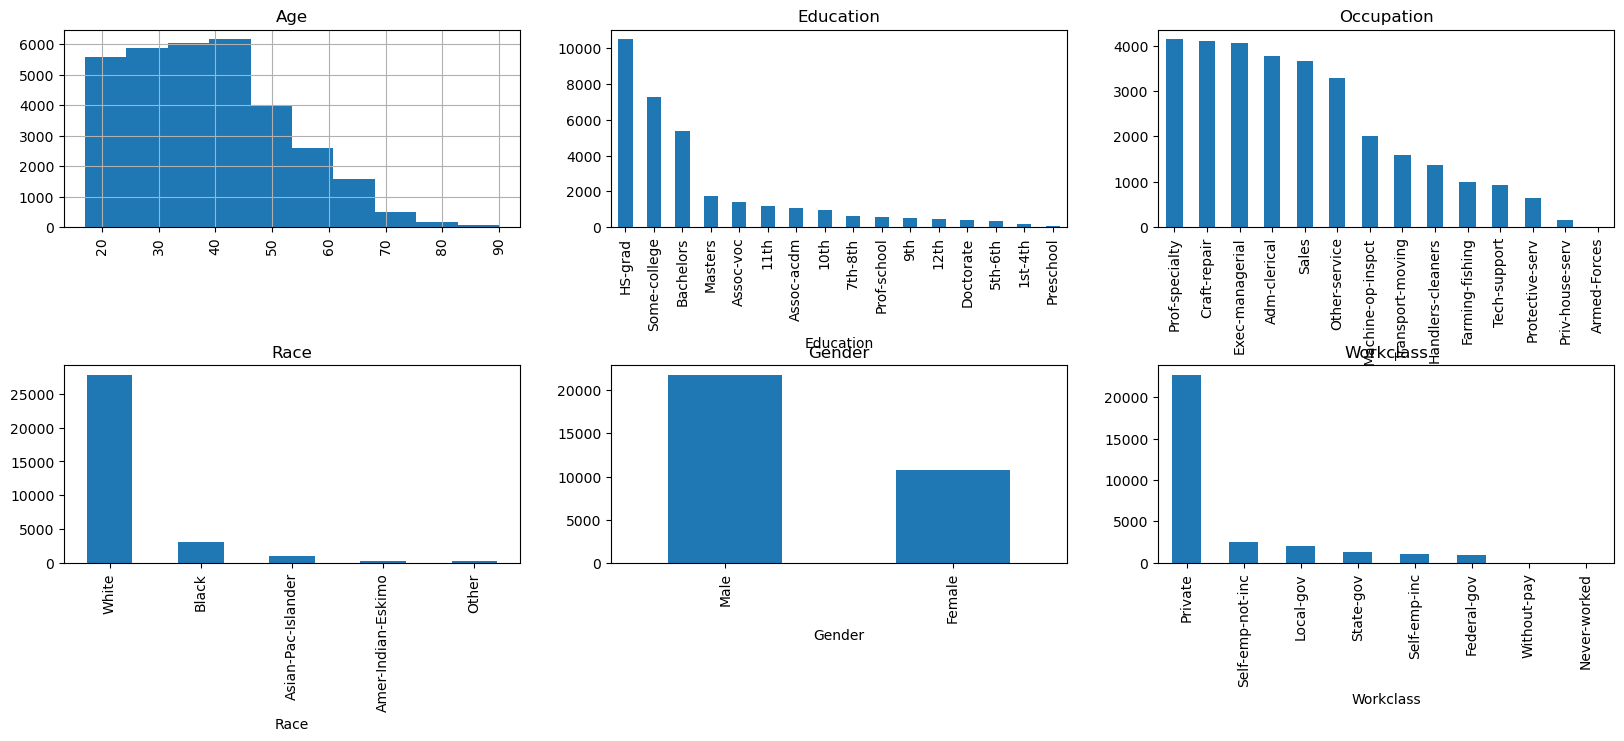

In [10]:
import matplotlib.pyplot as plt
import math
import numpy as np
%matplotlib inline
#%matplotlib inline is a python magic library used to plot the graph in line
fig=plt.figure(figsize=(20,20))
cols=3
rows=math.ceil(float(original_data.shape[1])/cols)
for i,column in enumerate(["Age","Education","Occupation","Race","Gender","Workclass"]):
    ax=fig.add_subplot(rows,cols,i+1)
    ax.set_title(column)
    if original_data.dtypes[column] == object:
         original_data[column].value_counts().plot(kind="bar",axes=ax)
    else:
        original_data[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7,wspace=0.2)
plt.show()

In [11]:
#use labelcoder to transfer text to numbers
import sklearn.preprocessing as preprocessing

le=preprocessing.LabelEncoder()
original_data["Occupation"]=le.fit_transform(original_data["Occupation"].astype(str))
original_data.head()

,Age,Workclass,fnlwgt,Education,Education_Num,Marital status,Occupation,Relationship,Race,Gender,capital,Loss,Hours per week,country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,0,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,3,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,5,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,5,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,9,Wife,Black,Female,0,0,40,Cuba,<=50K


In [12]:
original_data["Target"]=le.fit_transform(original_data["Target"].astype(str))
original_data.tail()
#head=x
#tail=y(target variable)

,Age,Workclass,fnlwgt,Education,Education_Num,Marital status,Occupation,Relationship,Race,Gender,capital,Loss,Hours per week,country,Target
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,12,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,6,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,0,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,0,Own-child,White,Male,0,0,20,United-States,0
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,3,Wife,White,Female,15024,0,40,United-States,1


In [13]:
original_data.Target.unique()
#to assure whether there is other value in target other than 0 and 1

array([0, 1])

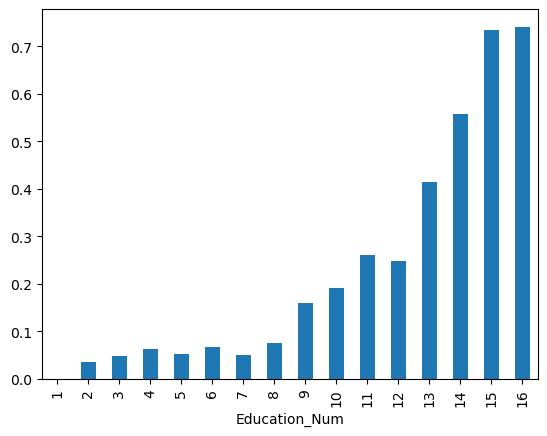

In [14]:
original_data.groupby("Education_Num").Target.mean().plot(kind="bar")
plt.show()
#this graph shows that as salary depends on largely on what education they persude

In [15]:
from sklearn.model_selection import train_test_split
#here train_test_split is used to split the data into two subset
#here one subset train the model and other test the model
x=original_data[["Education_Num","Occupation"]]
y=original_data["Target"]
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [19]:
from sklearn.svm import SVC
#declaring the SVC with no tunning
classifier=SVC()
#fitting the data.this is where the svm will learn
classifier.fit(x_train,y_train)
#predicting the result and giving the accuracy
score = classifier.score(x_test,y_test)
print(score)

0.7861200675571933


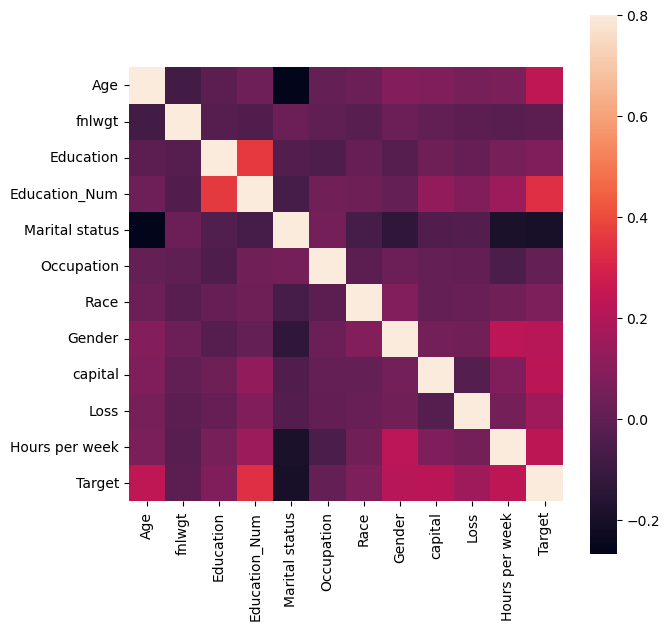

In [20]:
#correlation matrix
import seaborn as sns
numeric_data = original_data.select_dtypes(include='number')
#we should include number to convert the string to float

corrmat = numeric_data.corr()
f, ax =plt.subplots(figsize=(7, 7))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()
#only fields with numeric show the correlation

In [21]:
#convert potential relevant fiels to have numeric values
original_data['Race'] =le.fit_transform(original_data['Race'].astype(str))
original_data['Gender']=le.fit_transform(original_data['Gender'].astype(str))
original_data['Marital status']=le.fit_transform(original_data['Marital status'].astype(str))
original_data['Education']=le.fit_transform(original_data['Education'].astype(str))

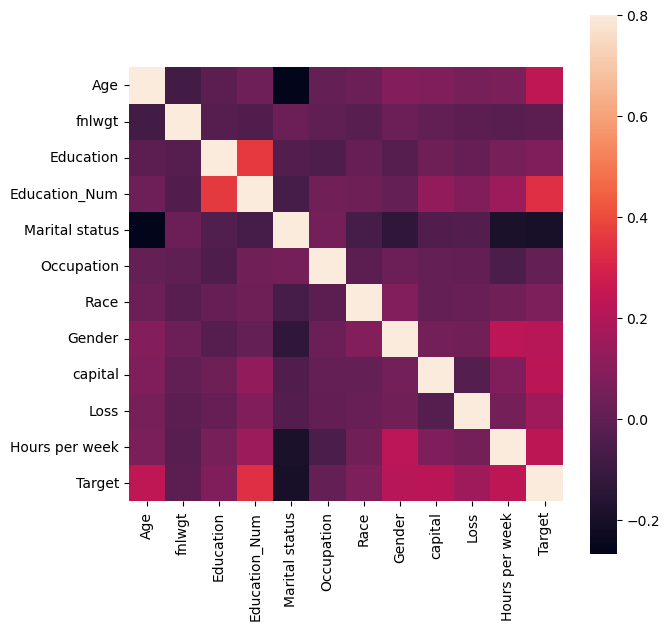

In [22]:
corrmat = numeric_data.corr()
f, ax =plt.subplots(figsize=(7, 7))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

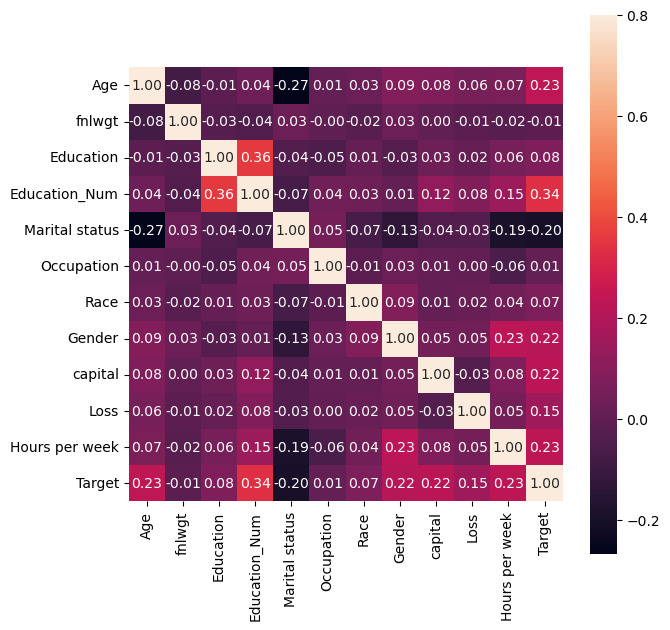

In [23]:
#to get the actual correlation values,annotate the heatmap
#fmt indicates the format
f, ax =plt.subplots(figsize=(7, 7))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, fmt='.2f')
plt.show()

In [24]:
#resetting the features
x=original_data[["Education_Num","Occupation","Age","Gender"]]
y=original_data["Target"]
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)
classifier=SVC()
#fitting the data.this is where the svm will learn
classifier.fit(x_train,y_train)
#predicting the result and giving the accuracy
score = classifier.score(x_test,y_test)
print(score)
#we are doing to increase the test result


0.7953324120988792


In [28]:
#setting our kernal to radical basis function with penality paramter C=0.1
classifier= SVC(kernel='rbf',C=1.0)
classifier.fit(x_train,y_train)

score=classifier.score(x_test,y_test)
print(score)

0.7953324120988792


In [29]:
#setting our kernal to radical basis function with penality paramter C=0.1
classifier=SVC(kernel='rbf',C=10.0)
classifier.fit(x_train,y_train)

score=classifier.score(x_test,y_test)
print(score)

0.7968678028558268


In [31]:
classifier=SVC(kernel='linear',C=1.0)
classifier.fit(x_train,y_train)

score=classifier.score(x_test,y_test)
print(score)
#hyperparameter tunning

0.796714263780132


In [32]:
#SVC stands for Support Vector Classification, which is a type of SVM algorithm used for classification tasks.

#kernel='rbf' specifies that the algorithm should use a radial basis function (RBF) kernel. The RBF kernel is commonly used in SVMs and is effective in handling non-linear decision boundaries.

#C=10.0 is a parameter that controls the regularization strength. A higher value of C implies a lower tolerance for classification errors on the training set, which can lead to a more complex decision boundary. It helps in preventing overfitting by penalizing misclassifications.